In [1]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-02-04 17:06:21.937479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 17:06:21.937572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 17:06:22.068607: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Building CNN Model:

In [4]:
labels = os.listdir("/kaggle/input/drowsiness-dataset/train")

In [5]:
labels

['Closed', 'Open', 'yawn', 'no_yawn']

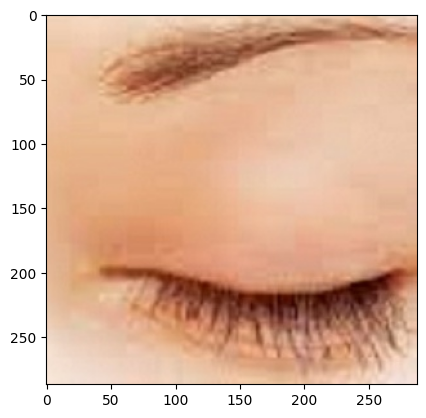

In [6]:
plt.imshow(plt.imread("/kaggle/input/drowsiness-dataset/train/Closed/_100.jpg"))

In [7]:
a = plt.imread("/kaggle/input/drowsiness-dataset/train/Closed/_107.jpg")

In [8]:
a

array([[[211, 168, 149],
        [211, 168, 149],
        [210, 167, 148],
        ...,
        [130,  94,  80],
        [128,  92,  78],
        [126,  90,  76]],

       [[212, 169, 150],
        [211, 168, 149],
        [210, 167, 148],
        ...,
        [130,  94,  80],
        [128,  92,  78],
        [127,  91,  77]],

       [[211, 170, 150],
        [211, 170, 150],
        [210, 167, 148],
        ...,
        [131,  95,  81],
        [129,  93,  79],
        [128,  92,  78]],

       ...,

       [[159, 111,  91],
        [160, 112,  92],
        [159, 111,  91],
        ...,
        [148, 104,  91],
        [148, 104,  91],
        [147, 103,  92]],

       [[160, 112,  92],
        [161, 113,  93],
        [161, 113,  93],
        ...,
        [148, 104,  91],
        [147, 103,  90],
        [147, 103,  92]],

       [[161, 113,  93],
        [162, 114,  94],
        [162, 114,  94],
        ...,
        [148, 104,  91],
        [147, 103,  90],
        [147, 103,  92]]

In [9]:
a.shape

(166, 173, 3)

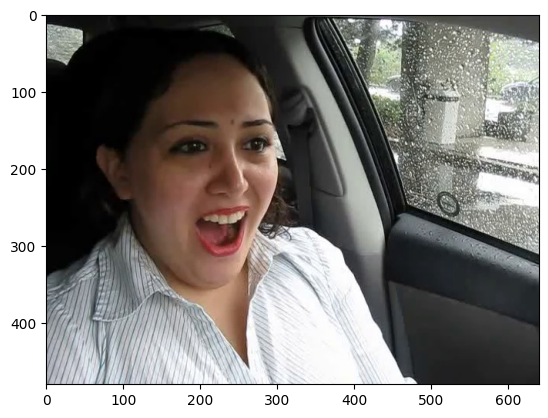

In [10]:
plt.imshow(plt.imread("/kaggle/input/drowsiness-dataset/train/yawn/102.jpg"))

In [11]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [12]:
train_data = train_data_gen.flow_from_directory("/kaggle/input/drowsiness-dataset/train",
                                                target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [13]:
validation_data = train_data_gen.flow_from_directory("/kaggle/input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [14]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [15]:
test_data = test_data_gen.flow_from_directory("/kaggle/input/drowsiness-dataset/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [16]:
train_data

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization,Activation
from tensorflow.keras.optimizers import Adam

In [18]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.5)(x)
    
    return x

    
    

In [19]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.5)(x)
    
    return x

    
    

In [20]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,256,(3,3))
    conv_2=Convolution(conv_1,128,(3,3))
    conv_3=Convolution(conv_2,64,(3,3))
    conv_4=Convolution(conv_3,32,(3,3))
    
    flatten=Flatten()(conv_4)
    
    dense_1=Dense_f(flatten,64)
    dense_2=Dense_f(dense_1,64)
    
    output=Dense(4,activation="softmax")(dense_2)
    model=Model(inputs=[inputs],outputs=[output])
    opt=Adam(lr=0.0005)
    model.compile(loss=['categorical_crossentropy'],optimizer=opt,metrics=['accuracy'])
    
    return model


In [21]:
model=model_fer((80,80,3))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 80, 80, 256)       7168      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 256)       1024      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 80, 80, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 40, 40, 256)       0     

In [22]:
validation_steps = len(test_data)
validation_steps

363

In [23]:
hist = model.fit(train_data, epochs=55, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/55


2024-02-04 17:07:00.959180: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1707066424.313258     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


291/291 [==============================] - 28s 68ms/step - loss: 1.1720 - accuracy: 0.4653 - val_loss: 2.8291 - val_accuracy: 0.2503
Epoch 2/55
291/291 [==============================] - 13s 46ms/step - loss: 0.8731 - accuracy: 0.5399 - val_loss: 3.0865 - val_accuracy: 0.2524
Epoch 3/55
291/291 [==============================] - 13s 45ms/step - loss: 0.7867 - accuracy: 0.5804 - val_loss: 1.0193 - val_accuracy: 0.5548
Epoch 4/55
291/291 [==============================] - 13s 46ms/step - loss: 0.7124 - accuracy: 0.6510 - val_loss: 1.1384 - val_accuracy: 0.4393
Epoch 5/55
291/291 [==============================] - 13s 45ms/step - loss: 0.6359 - accuracy: 0.6846 - val_loss: 1.5043 - val_accuracy: 0.4310
Epoch 6/55
291/291 [==============================] - 13s 45ms/step - loss: 0.6120 - accuracy: 0.6967 - val_loss: 0.4921 - val_accuracy: 0.7572
Epoch 7/55
291/291 [==============================] - 14s 48ms/step - loss: 0.5834 - accuracy: 0.7143 - val_loss: 1.5538 - val_accuracy: 0.3955
Epo

In [24]:
model.evaluate(test_data)

363/363 [==============================] - 7s 20ms/step - loss: 0.1707 - accuracy: 0.9348


[0.1707172393798828, 0.9348275661468506]

In [25]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

# plotting accuracy

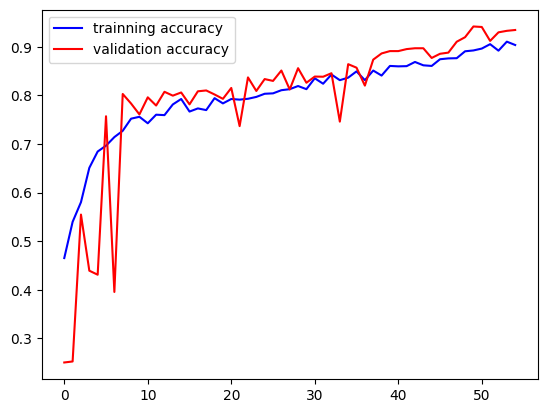

In [26]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

# plotting loss

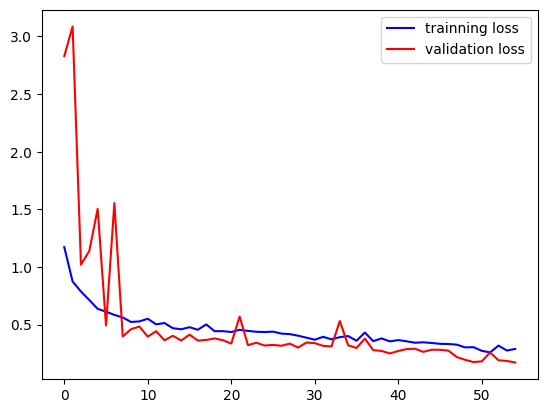

In [27]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# Saving model

In [28]:
model.save("drowiness.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model.save("drowiness.model")

# Testing with an image

In [30]:
#pip install pillow

In [31]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np

In [32]:
model = load_model('drowiness.h5')

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 80, 80, 256)       7168      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 256)       1024      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 80, 80, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 40, 40, 256)       0     

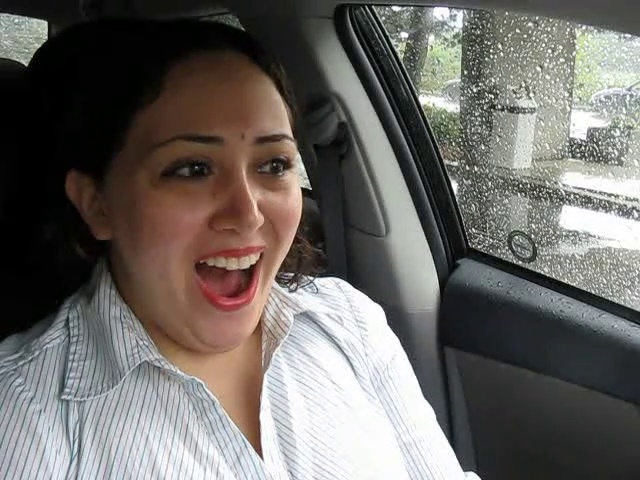

In [34]:
Image.open("/kaggle/input/drowsiness-dataset/train/yawn/101.jpg")

In [35]:
image_size = (80, 80)

In [44]:
img = Image.open("/kaggle/input/drowsiness-dataset/train/yawn/101.jpg").resize(image_size)

In [45]:
img = np.array(img)/255.0

In [46]:
img.shape

(80, 80, 3)

In [47]:
result = model.predict(img[np.newaxis, ...])

1/1 [==============================] - 0s 18ms/step


In [48]:
result.shape

(1, 4)

In [49]:
result

array([[1.7237382e-04, 7.2710887e-02, 4.0288612e-01, 5.2423060e-01]],
      dtype=float32)

In [50]:
predicted_label_index = np.argmax(result)

In [51]:
if (predicted_label_index==0):
    print('Closed eyes')
    
elif predicted_label_index==1:
    print('No Yawn Detected')
    
elif predicted_label_index==2:
    print('Open eyes')
    
elif predicted_label_index==3:
    print('Yawn Detected')

Yawn Detected


In [52]:
if (predicted_label_index==0) & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==3):
    print('Drowsiness Detected')

elif predicted_label_index==2 & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==1) & (predicted_label_index==2):
    print('No Drowsiness Detected')
    
elif predicted_label_index==1:
    print('No Drowsiness Detected')

Drowsiness Detected
